
### Problem 1

Consider the following linear least squares problem

\begin{align}
\min \frac{1}{2}((x_1+x_2-3)^2+(2x_1-x_2+4)^2)
\end{align}

We want to write it in the QP form $\frac{1}{2}\mathbf{x}^T\mathbf{Q}\mathbf{x}+\mathbf{q}^T\mathbf{x}$

## Solution Processs
Stack the arguments within the square bracket and put it in standard linear form

\begin{align}
\min \frac{1}{2}\left \Vert \begin{bmatrix}
x_1+x_2-3\\
2x_1-x_2+4
\end{bmatrix}\right\Vert_2^2 = \frac{1}{2}\left \Vert \mathbf{A}\mathbf{x}-\mathbf{b}\right\Vert_2^2
\end{align}

\begin{align}
\mathbf{A} = \begin{bmatrix}
1 & 1\\
2 & -1
\end{bmatrix}, \mathbf{b} = \begin{bmatrix}
3 \\
-4
\end{bmatrix}
\end{align}

We can now define $\mathbf{Q} = \mathbf{A}^T\mathbf{A}, \mathbf{q} = -\mathbf{A}^Tb$

### Problem 2

Consider the following non-linear least-squares problem

\begin{align}
\min \frac{1}{2}\left\Vert \mathbf{c}(\mathbf{x})\right\Vert_2^2
\end{align}

where

\begin{align}
\left\Vert \mathbf{c}(\mathbf{x})\right\Vert_2^2 = \overbrace{(x_1^2+\sin x_2-3)^2}^{c_1(\mathbf{x})}+\overbrace{(\cos x_1-\sin x_2)^2}^{c_2(\mathbf{x})}
\end{align}

$\mathbf{x} = (x_1, x_2)$


## Solution Process

Construct the folowing vector valued function

\begin{align}
\mathbf{c}(\mathbf{x}) = \begin{bmatrix}
x_1^2+\sin x_2-3\\
\cos x_1-\sin x_2
\end{bmatrix}
\end{align}

Jacobian around some point ${^k}\mathbf{x}$

\begin{align}
\mathbf{A} = \begin{bmatrix}
\nabla_{x}c_1({^k}\mathbf{x})\\
\nabla_{x}c_2({^k}\mathbf{x})
\end{bmatrix}
\end{align}

And linear approximation of $\mathbf{c}(\mathbf{x})$

\begin{align}
\mathbf{c}(\mathbf{x})\approx \mathbf{A}\mathbf{x}-\mathbf{b}
\end{align}

$\mathbf{b} = \mathbf{A}{^k}\mathbf{x}-\mathbf{c}({^k}\mathbf{x})$

LS approximation of NLS is given by

\begin{align}
\frac{1}{2}\left\Vert \mathbf{c}(\mathbf{x})\right\Vert_2^2 \approx \frac{1}{2}\left \Vert \mathbf{A}\mathbf{x}-\mathbf{b}\right\Vert_2^2 = \frac{1}{2}\mathbf{x}^T\mathbf{Q}\mathbf{x}+\mathbf{q}^T\mathbf{x}
\end{align}




[[ 2.          0.5403023 ]
 [-0.84147096 -0.5403023 ]]
[ 1.7951117  -0.22430521]


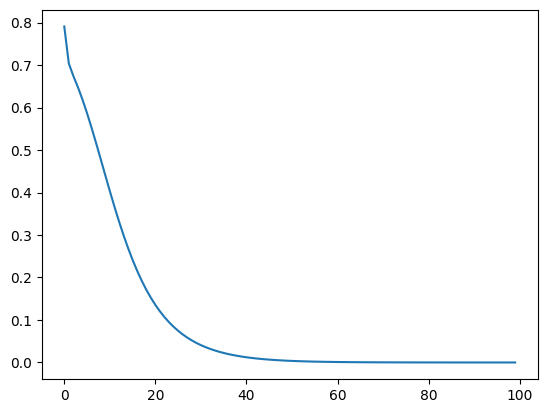

In [11]:
import numpy as np
import jax.numpy as jnp

import matplotlib.pyplot as plt

from jax import jit, random, jacfwd



def compute_error_func(x ):

  x_1 = x[0]
  x_2 = x[1]

  error_1 = x_1**2+jnp.sin(x_2)-3
  error_2 = jnp.cos(x_1)-jnp.sin(x_2)

  c = jnp.hstack(( error_1, error_2   ))

  return c

jac_func = jacfwd(compute_error_func, argnums = (0))

x = jnp.ones(2)

print(jac_func(x))


#### Gauss Newton Loop

maxiter = 100

error_track = []
eta = 0.3
for i in range(0, maxiter):
  A = jac_func(x)
  b = jnp.dot(A, x)-compute_error_func(x)

  Q = jnp.dot(A.T, A)+(1/eta)*jnp.identity(2)
  q = -jnp.dot(A.T, b)-(1/eta)*x

  x = jnp.linalg.solve(Q, -q)

  error_value = compute_error_func(x)
  error_track.append(jnp.linalg.norm(error_value))


print(x)

plt.figure(1)
plt.plot(error_track)

plt.show()






### Problem 3

## Solve the NLS problem for IK problem

\begin{align}
\min \frac{1}{2}\left \Vert c(\boldsymbol{\theta})\right \Vert_2^2
\end{align}

\begin{align}
\left \Vert c(\boldsymbol{\theta})\right \Vert_2^2 = (l_1\cos \theta_1+l_2\cos(\theta_1+\theta_2)+l_3 \cos(\theta_1+\theta_2+\theta_3)-x_f)^2+(l_1\sin \theta_1+l_2\sin(\theta_1+\theta_2)+l_3 \sin(\theta_1+\theta_2+\theta_3)-y_f)^2
\end{align}




In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import jax.numpy as jnp
from jax import jit, random, jacfwd



x_f = 1.0
y_f = 2.0

l_1 = 1.5
l_2 = 1.5
l_3 = 1.5

